In [27]:
!pip install opencv-python


In [28]:
import cv2
print("✅ OpenCV is working in this notebook.")


✅ OpenCV is working in this notebook.


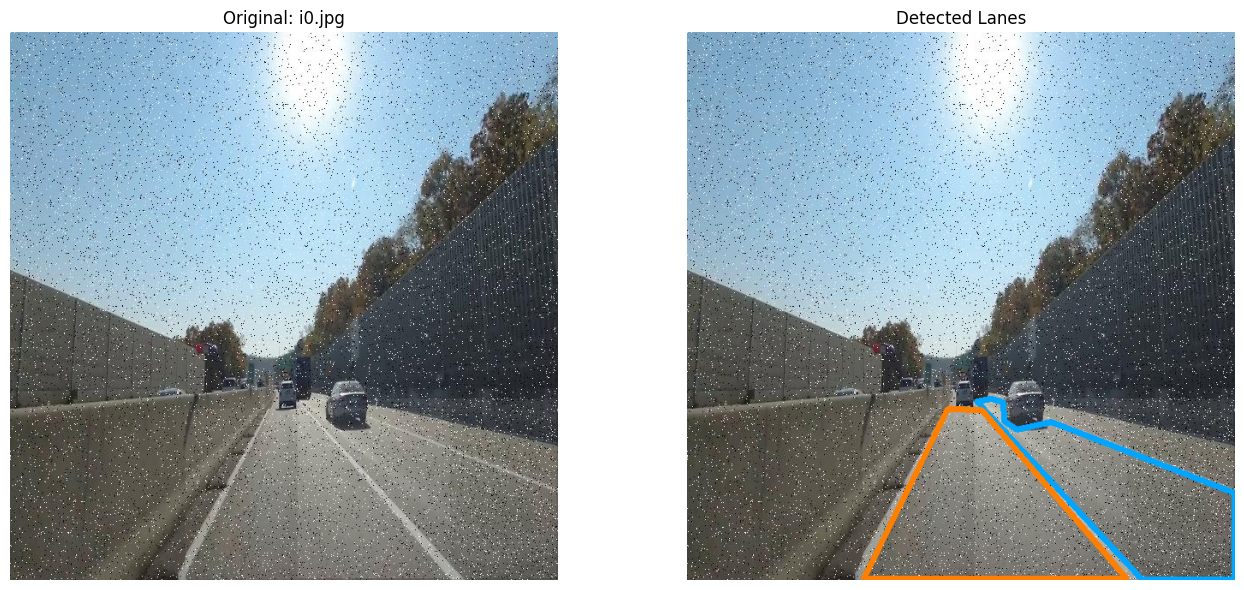

In [26]:
import matplotlib.pyplot as plt
import cv2
import os

# ✅ Replace with your actual dataset path
dataset_path = r"C:/Users/sahit/OneDrive/Documents/Desktop/internships/Next24tech/road_lane"

# Paths to images and labels
train_images_path = os.path.join(dataset_path, 'train', 'images')
train_labels_path = os.path.join(dataset_path, 'train', 'labels')

# Sample file
sample_image_file = os.listdir(train_images_path)[0]
sample_label_file = os.path.splitext(sample_image_file)[0] + '.txt'

# Load original image
image_path = os.path.join(train_images_path, sample_image_file)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape

# ✅ Make a copy for lane drawing
lane_image = image.copy()

# Load label points and convert to pixel coordinates
label_path = os.path.join(train_labels_path, sample_label_file)
lanes = []

with open(label_path, 'r') as f:
    for line in f:
        coords = list(map(float, line.strip().split()[1:]))  # Skip lane ID
        points = [(int(coords[i] * width), int(coords[i+1] * height)) for i in range(0, len(coords), 2)]
        lanes.append(points)

# Draw lanes on the copy
colors = [(0, 165, 255), (255, 127, 0), (0, 255, 0), (255, 0, 255)]
for i, lane in enumerate(lanes):
    for j in range(len(lane) - 1):
        cv2.line(lane_image, lane[j], lane[j+1], colors[i % len(colors)], thickness=5)

# 🖼 Show both images side by side
plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f"Original: {sample_image_file}")
plt.axis('off')

# With lanes
plt.subplot(1, 2, 2)
plt.imshow(lane_image)
plt.title("Detected Lanes")
plt.axis('off')

plt.tight_layout()
plt.show()
